# K-Means with the Iris Dataset 
In this notebook, we will implement K-Means on the Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

## Data
Loads the iris data set from sklearn's dataset.

In [2]:
iris = datasets.load_iris()


Uses panda library to show data values. 

In [3]:
x = np.array([(c,d) for _, _, c, d in iris.data])
x=pd.DataFrame(x)
x.columns=['Petal_Length','Petal_width']
x

,Petal_Length,Petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


Creates data fram to view label information.

In [4]:
y=pd.DataFrame(iris.target)
y.columns=['Targets']
y

,Targets
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Model
Creates model with 3 clusters and fits the data. Note that we never use the y variable here because this is unsupervised learning so we are pretending we only have unlabeled data. 

In [5]:

model=KMeans(n_clusters=3)
model.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Results 

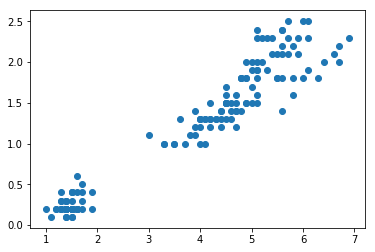

In [6]:
#Visualisation des clusters
plt.scatter(x.Petal_Length, x.Petal_width)

In [7]:
colormap=np.array(['Red','green','blue'])

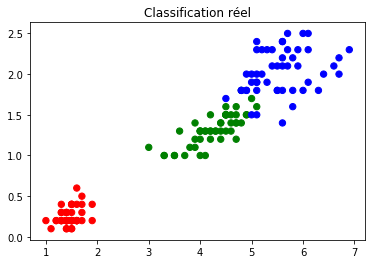

In [8]:
#Visualisation des clusters
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.title('Classification réel')

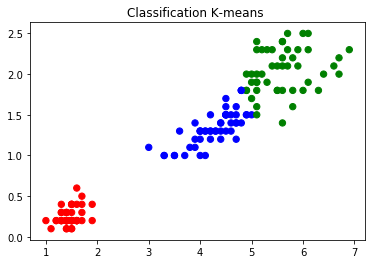

In [9]:
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')

### Centroids 
Centroid are plotted using yellow dots

Coordinates of cluster 1 is (1.46, 0.25)
Coordinates of cluster 2 is (5.60, 2.04)
Coordinates of cluster 3 is (4.27, 1.34)


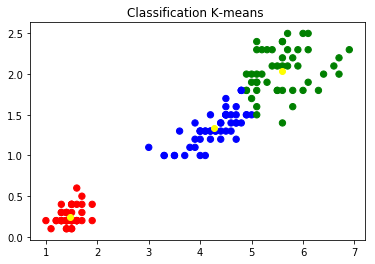

In [10]:
model.cluster_centers_
for i in range(len(model.cluster_centers_)):
    print("Coordinates of cluster {0} is ({1:.2f}, {2:.2f})".format(i+1,model.cluster_centers_[i][0], model.cluster_centers_[i][1]))
    
    

a, b = model.cluster_centers_.T #puts all x cords in a and y in b 
    
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.scatter(a, b, c = "yellow",)
plt.title('Classification K-means ')

## Performance Analaysis 

In [11]:
predY = np.choose(model.labels_, [0,2,1])
print("Predicted Groupings:", predY)
print("Actual Groupings:", iris.target)

count = 0 
for pred, real in zip(predY, y.Targets):
    if pred != real:
        count += 1

print("{} flowers were grouped incorrectly".format(count))

Predicted Groupings: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
Actual Groupings: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
6 flowers were grouped incorrectly
